### Statistical Thinking in Python (Part 1)

#### Exploratory Data Analysis 

In [8]:
 # import
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# reading excel file
fh = pd.ExcelFile("dataset/EAVS.xlsx")
fh
print(fh.sheet_names)

['SectionC']


In [10]:
data = fh.parse("SectionC")
data.head()

,State,Jurisdiction,FIPSCode,QC1a,QC1b,QC1c,QC1d,QC1e,QC1f,QC1f_Other,...,QC5s,QC5s_Other,QC5t,QC5t_Other,QC5u_,QC5u_Other,QC5v,QC5_Total,QC5v_Other,QC5_Comment
0,AK,ALASKA,200000000,22861.0,19296.0,101.0,306.0,3158.0,NaN,NaN,...,73.0,Postmarked or witnessed after election day,NaN,NaN,NaN,NaN,NaN,552.0,NaN,NaN
1,AL,AUTAUGA COUNTY,100100000,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,BALDWIN COUNTY,100300000,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,BARBOUR COUNTY,100500000,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,BIBB COUNTY,100700000,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
## Loading the IRIS dataset
irisds = load_iris()

# selecting the data field only
data = irisds['data']
# saving into csv file

col = irisds['feature_names']
print(len(data))

150


In [12]:
# sample data
print(col)
data[:5]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

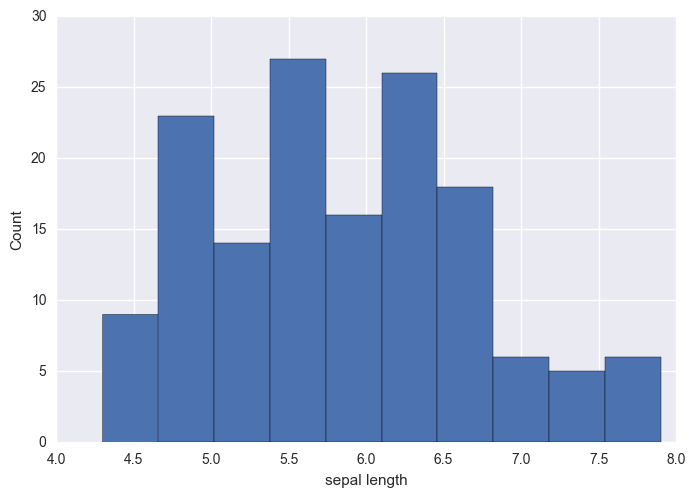

In [13]:
# plotting the sepal length ( sns style)
sepal = data[:,0]

sns.set()
plt.hist(sepal)
plt.xlabel("sepal length")
plt.ylabel("Count")

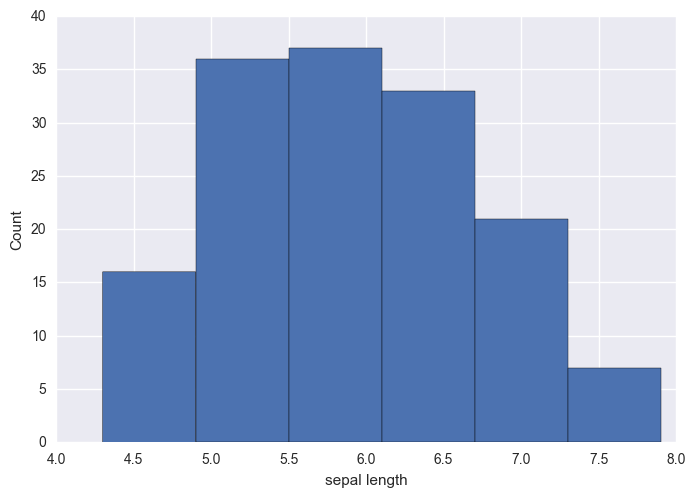

In [14]:
# by default matplotlib creates 10 bins, we can customize it 2 ways
# no of bins

# plotting the sepal length ( sns style)
sepal = data[:,0]

sns.set()
plt.hist(sepal, bins=6)
plt.xlabel("sepal length")
plt.ylabel("Count")

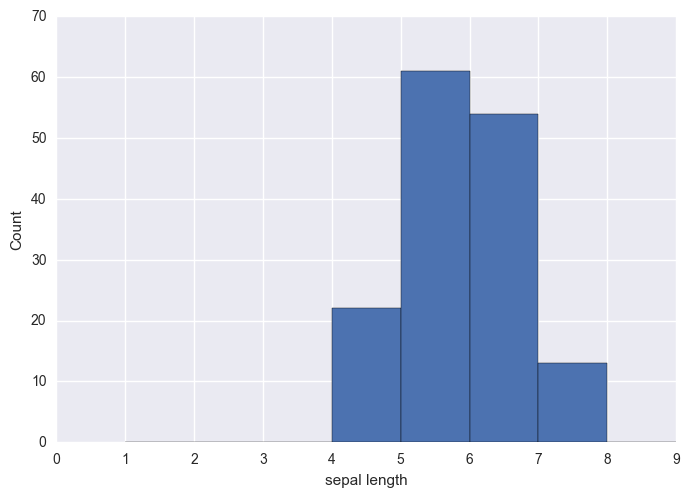

In [15]:
# bins details

# plotting the sepal length ( sns style)
sepal = data[:,0]

sns.set()
plt.hist(sepal, bins=[ x for x in range(0, 10)])
plt.xlabel("sepal length")
plt.ylabel("Count")

In [16]:

iris = pd.DataFrame(data, columns=col)
iris['species'] = ['Setosa' if x==0 else 'Versicolour' if x==1 else 'Virginica' for x in irisds['target']]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


** Bee Sworm plot **

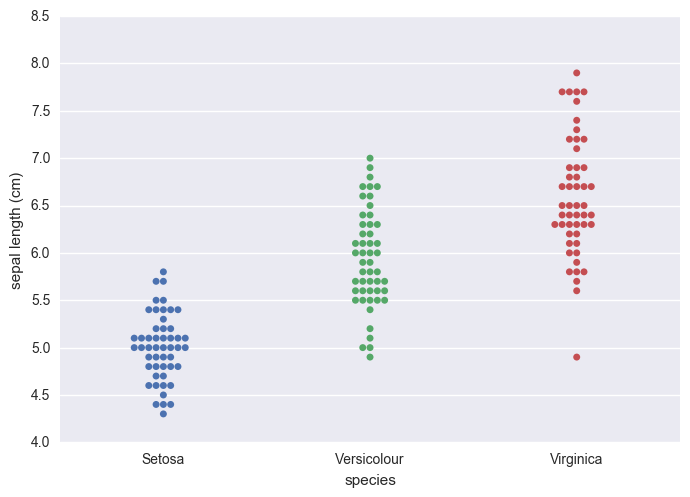

In [17]:
sns.set()
sns.swarmplot(x="species", y='sepal length (cm)', data=iris)
plt.xlabel("species")
plt.ylabel("sepal length (cm)")

** Empirical cumulative distribution function (ECDF) **

In [18]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

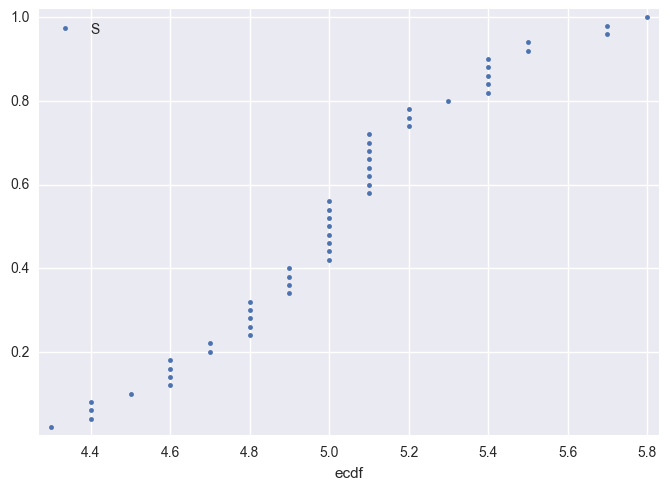

In [19]:
# plotting

x, y = ecdf(iris[iris['species']=='Setosa']['sepal length (cm)'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("sepal length (cm)")
plt.xlabel("ecdf")
plt.margins(0.02)
plt.legend(('Setosa'), loc='upper left')

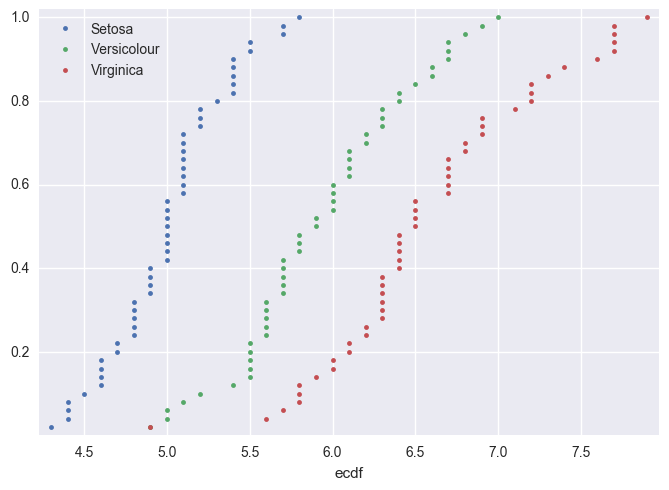

In [20]:
# plotting all species
x, y = ecdf(iris[iris['species']=='Setosa']['sepal length (cm)'])
plt.plot(x, y, marker='.', linestyle='none')

x, y = ecdf(iris[iris['species']=='Versicolour']['sepal length (cm)'])
plt.plot(x, y, marker='.', linestyle='none')

x, y = ecdf(iris[iris['species']=='Virginica']['sepal length (cm)'])
plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel("sepal length (cm)")
plt.xlabel("ecdf")
plt.margins(0.02)
plt.legend(('Setosa','Versicolour', 'Virginica'), loc='upper left')

### Summary Statistics 

**mean** - avg value but it is affected by outliers values


$$ mean = \frac{1}{n}\Sigma_{i=1}^n {i_n} $$
$$ mean = \frac{1}{n}\sum_{n=1}^n {i_n} $$

**median** - middile value in values, doesn't affected by diversity of values

In [21]:
# checking out what is avg and median sepal length (cm) for Virginica species

print("Mean : ",np.mean(iris[iris['species']=='Virginica']['sepal length (cm)']))
print("Median : ",np.median(iris[iris['species']=='Virginica']['sepal length (cm)']))

Mean :  6.587999999999998
Median :  6.5


In [22]:
# creating variables
virgin = iris[iris['species']=='Virginica']
setosa = iris[iris['species']=='Setosa']
versi = iris[iris['species']=='Versicolour']

In [23]:
# getting percentile 25, 50, 75

print("25, 50, 70 percentile", np.percentile(virgin['sepal length (cm)'], [25, 50, 75]))

25, 50, 70 percentile [ 6.225  6.5    6.9  ]


    for repesenting the percentile and checking the outliers, we use boxplot
    in box plot, box starts from 25% , median 50% and end at 75%
    whiskers are ususllay represent the 1.5x range of box values(25-75)
    If there is any points after the whiskers are called outliers 

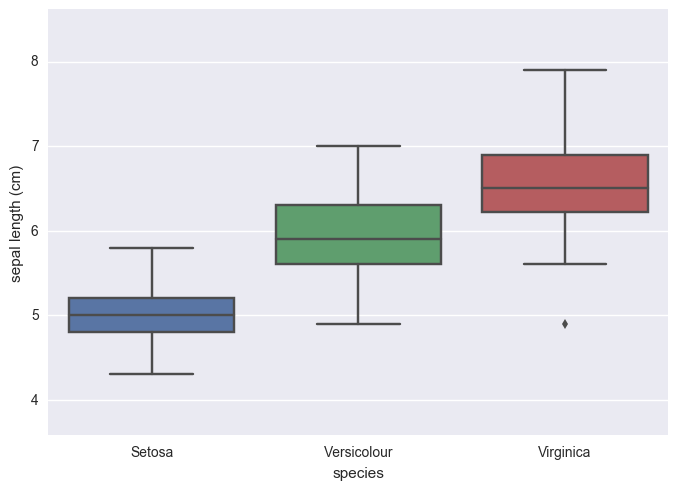

In [24]:
#sns.boxplot(x='species', y='sepal length (cm)', data=virgin)
#sns.boxplot(x='species', y='sepal length (cm)', data=setosa)
#sns.boxplot(x='species', y='sepal length (cm)', data=versi)

sns.boxplot(x='species', y='sepal length (cm)', data=iris)
plt.margins(0.2)

**Variance** - it is the sum of squared distance of data-point from mean data-point

if x(bar) is mean

$$ variance = \frac{1}{n}{\sum_{i=1}^{n}(x_i - \bar{x})^2} $$

** Standard Variance ** - square root of variance

$$ std =\sqrt{\frac{1}{n}{\sum_{i=1}^{n}(x_i - \bar{x})^2}} $$

higher std value represents the more diverse data

In [25]:
var = np.var(versi['sepal length (cm)'])
var

0.2611040000000001

In [26]:
std1 = np.sqrt(var)
std2 = np.std(versi['sepal length (cm)'])
print(std1, std2)

0.510983365678 0.5109833656783752


** covariance ** - how two datapoints are related with each other
Or A measure of how two quantities vary together

$$ cov = \frac{1}{n}{\sum{(x-\bar{x})}{(y-\bar{y})}} $$

** Pearson correlation coeﬃcient ** - 

$$ \rho = \frac{\frac{1}{n}{\sum{(x-\bar{x})}{(y-\bar{y})}}}{std(x) std(y)} $$

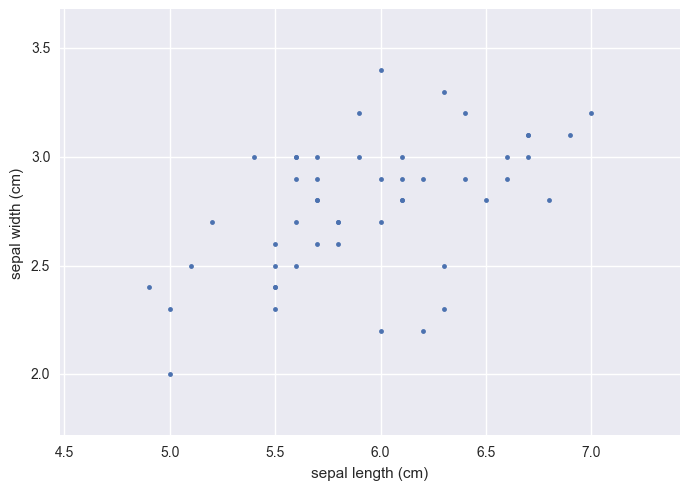

In [27]:
# plotting the scatter plot
plt.plot(versi['sepal length (cm)'], versi['sepal width (cm)'], marker='.',linestyle='none')
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.margins(0.2)

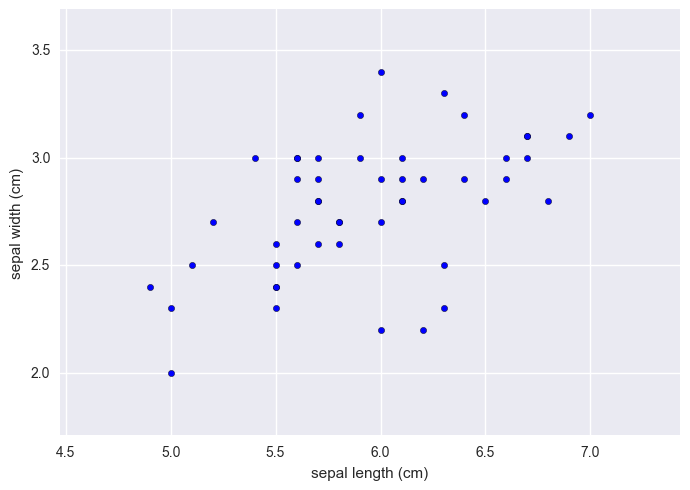

In [28]:
plt.scatter(versi['sepal length (cm)' ], versi['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel("sepal width (cm)")
plt.margins(0.2)

In [29]:
## Calculating the covariance
cov_mat = np.cov(versi['sepal length (cm)'], versi['sepal width (cm)'])
print(cov_mat)

[[ 0.26643265  0.08518367]
 [ 0.08518367  0.09846939]]


In [30]:
## Calculating the corelation coefficient
coef = np.corrcoef(versi['sepal length (cm)'], versi['sepal width (cm)'])
print(coef)
print(coef[0,1])

[[ 1.          0.52591072]
 [ 0.52591072  1.        ]]
0.525910717283


In [31]:
# let's calculate the corelation coefficient in math
std_len = np.std(versi['sepal length (cm)'])
std_wid = np.std(versi['sepal width (cm)'])
print(std_len, std_wid)

coeff = cov_mat/(std_len*std_wid)
coeff

0.5109833656783752 0.31064449134018135


array([[ 1.67848332,  0.53664359],
       [ 0.53664359,  0.62034148]])